In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
benchmark = '../../benchmarks/edgetpu'

In [6]:
# first inference gets ignored because it loads model into memory
effnet_S = pd.read_csv(f'{benchmark}/efficientnet/results_effnet-S.csv')[1:]
effnet_M = pd.read_csv(f'{benchmark}/efficientnet/results_effnet-M.csv')[1:]
effnet_L = pd.read_csv(f'{benchmark}/efficientnet/results_effnet-L.csv')[1:]

incept_v1 = pd.read_csv(f'{benchmark}/inception/results_inception_v1.csv')[1:]
incept_v2 = pd.read_csv(f'{benchmark}/inception/results_inception_v2.csv')[1:]
incept_v3 = pd.read_csv(f'{benchmark}/inception/results_inception_v3.csv')[1:]
incept_v4 = pd.read_csv(f'{benchmark}/inception/results_inception_v4.csv')[1:]

mobile_v1 = pd.read_csv(f'{benchmark}/mobilenet/results_mobilenet_v1.csv')[1:]
mobile_v2 = pd.read_csv(f'{benchmark}/mobilenet/results_mobilenet_v2.csv')[1:]
mobile_v3 = pd.read_csv(f'{benchmark}/mobilenet/results_mobilenet_v3.csv')[1:]

resnet_50 = pd.read_csv(f'{benchmark}/resnet-50/results_resnet-50.csv')[1:]

In [7]:
init_effnet_s  = pd.read_csv(f'{benchmark}/efficientnet/results_effnet-S.csv')[:1]
init_effnet_m  = pd.read_csv(f'{benchmark}/efficientnet/results_effnet-M.csv')[:1]
init_effnet_l  = pd.read_csv(f'{benchmark}/efficientnet/results_effnet-L.csv')[:1]
init_incept_v1 = pd.read_csv(f'{benchmark}/inception/results_inception_v1.csv')[:1]
init_incept_v2 = pd.read_csv(f'{benchmark}/inception/results_inception_v2.csv')[:1]
init_incept_v3 = pd.read_csv(f'{benchmark}/inception/results_inception_v3.csv')[:1]
init_incept_v4 = pd.read_csv(f'{benchmark}/inception/results_inception_v4.csv')[:1]
init_mobile_v1 = pd.read_csv(f'{benchmark}/mobilenet/results_mobilenet_v1.csv')[:1]
init_mobile_v2 = pd.read_csv(f'{benchmark}/mobilenet/results_mobilenet_v2.csv')[:1]
init_mobile_v3 = pd.read_csv(f'{benchmark}/mobilenet/results_mobilenet_v3.csv')[:1]
init_resnet_50 = pd.read_csv(f'{benchmark}/resnet-50/results_resnet-50.csv')[:1]

In [8]:
init_effnet_s = init_effnet_s['TimeMS'][0]
init_effnet_m = init_effnet_m['TimeMS'][0]
init_effnet_l = init_effnet_l['TimeMS'][0]

init_incept_v1 = init_incept_v1['TimeMS'][0]
init_incept_v2 = init_incept_v2['TimeMS'][0]
init_incept_v3 = init_incept_v3['TimeMS'][0]
init_incept_v4 = init_incept_v4['TimeMS'][0]

init_mobile_v1 = init_mobile_v1['TimeMS'][0]
init_mobile_v2 = init_mobile_v2['TimeMS'][0]
init_mobile_v3 = init_mobile_v3['TimeMS'][0]

init_resnet_50 = init_resnet_50['TimeMS'][0]

### Mean inference times

In [9]:
mean_effnet_s = effnet_S['TimeMS'].mean()
mean_effnet_m = effnet_M['TimeMS'].mean()
mean_effnet_l = effnet_L['TimeMS'].mean()

mean_incept_v1 = incept_v1['TimeMS'].mean()
mean_incept_v2 = incept_v2['TimeMS'].mean()
mean_incept_v3 = incept_v3['TimeMS'].mean()
mean_incept_v4 = incept_v4['TimeMS'].mean()

mean_mobile_v1 = mobile_v1['TimeMS'].mean()
mean_mobile_v2 = mobile_v2['TimeMS'].mean()
mean_mobile_v3 = mobile_v3['TimeMS'].mean()

mean_resnet_50 = resnet_50['TimeMS'].mean()

In [10]:
print(f'Efficientnet: \tS: {mean_effnet_s : .2f}ms   M: {mean_effnet_m : .2f}ms   L:{mean_effnet_l : .2f}ms')
print(f'Inception: \tV1: {mean_incept_v1 : .2f}ms  V2: {mean_incept_v2 : .2f}ms  V3:{mean_incept_v3 : .2f}ms  V4:{mean_incept_v4 : .2f}ms')
print(f'Mobilenet: \tV1: {mean_mobile_v1 : .2f}ms  V2: {mean_mobile_v2 : .2f}ms  V3:{mean_mobile_v3 : .2f}ms')
print(f'ResNet-50: \t{mean_resnet_50 : .2f}ms')

Efficientnet: 	S:  5.78ms   M:  10.06ms   L: 27.06ms
Inception: 	V1:  5.48ms  V2:  18.72ms  V3: 53.78ms  V4: 103.15ms
Mobilenet: 	V1:  3.36ms  V2:  3.75ms  V3: 3.90ms
ResNet-50: 	 52.18ms


Model name | Inputsize | Latency | Model size |
|:---------|:--------:|:--------|:--------|
|EfficientNet-EdgeTpu-S|224x224x3|5.78ms|6.8MB|
|EfficientNet-EdgeTpu-M|240x240x3|10.06ms|8.7MB|
|EfficientNet-EdgeTpu-L|300x300x3|27.06ms|13MB|
|Inception V1|224x224x3|5.48ms|7.1MB|
|Inception V2|224x224x3|18.72ms|13.0MB|
|Inception V3|299x299x3|53.78ms|25.0MB|
|Inception V4|299x299x3|103.15ms|43.0MB|
|MobileNet V1|224x224x3|3.36ms|4.7MB|
|MobileNet V2|224x224x3|3.75ms|4.3MB|
|MobileNet V3|224x224x3|3.90ms|5.1MB|
|ResNet-50|224x224x3|52.18ms|26.0MB|

In [11]:
mean_inf_times = np.array([mean_effnet_s, 
                   mean_effnet_m, 
                   mean_effnet_l, 
                   mean_incept_v1,
                   mean_incept_v2,
                   mean_incept_v3,
                   mean_incept_v4,
                   mean_mobile_v1,
                   mean_mobile_v2,
                   mean_mobile_v3,
                   mean_resnet_50])

model_sizes = np.array([6.8, 8.7, 13.0, 7.1, 13.0, 25.0, 43.0, 4.7, 4.3, 5.1, 26.0])

In [12]:
init_load_times = np.array([init_effnet_s,
                            init_effnet_m,
                            init_effnet_l,
                            init_incept_v1,
                            init_incept_v2,
                            init_incept_v3,
                            init_incept_v4,
                            init_mobile_v1,
                            init_mobile_v2,
                            init_mobile_v3,
                            init_resnet_50])

## Edge Tpu
### Plot of average inference time in ms vs. model size in MB 

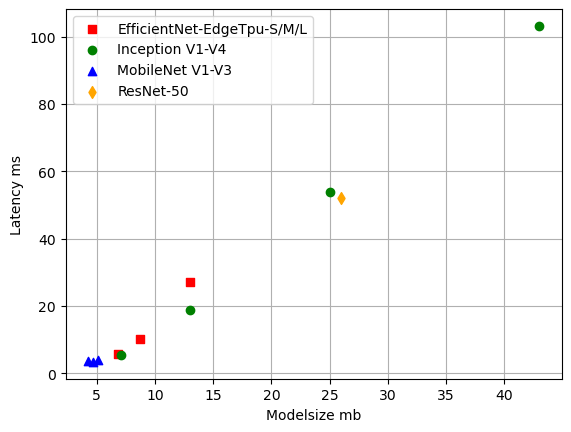

In [13]:
fig, ax = plt.subplots()

plt.xlabel('Modelsize mb')
plt.ylabel('Latency ms')
ax.set_axisbelow(True)
ax.grid()
ax.scatter(model_sizes[:3], mean_inf_times[:3], c='red', marker='s')
ax.scatter(model_sizes[3:7], mean_inf_times[3:7], c='green')
ax.scatter(model_sizes[7:10], mean_inf_times[7:10], c='blue', marker='^')
ax.scatter(model_sizes[10], mean_inf_times[10], c='orange', marker='d')
plt.legend(labels=['EfficientNet-EdgeTpu-S/M/L', 'Inception V1-V4', 'MobileNet V1-V3', 'ResNet-50'])

### plot of initial load time in ms vs. model size in MB

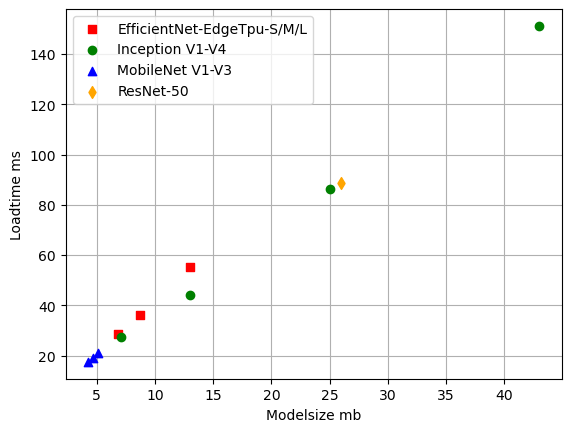

In [14]:
fig, ax = plt.subplots()

plt.xlabel('Modelsize mb')
plt.ylabel('Loadtime ms')
ax.set_axisbelow(True)
ax.grid()
ax.scatter(model_sizes[:3], init_load_times[:3], c='red', marker='s')
ax.scatter(model_sizes[3:7], init_load_times[3:7], c='green')
ax.scatter(model_sizes[7:10], init_load_times[7:10], c='blue', marker='^')
ax.scatter(model_sizes[10], init_load_times[10], c='orange', marker='d')
plt.legend(labels=['EfficientNet-EdgeTpu-S/M/L', 'Inception V1-V4', 'MobileNet V1-V3', 'ResNet-50'])

## CPU
### Mean Inference Time in ms vs. Modelsize in MB

In [20]:
effnet_S_cpu  = pd.read_csv(f'{benchmark}/efficientnet/results_cpu_effnet-S.csv')[1:]
effnet_M_cpu  = pd.read_csv(f'{benchmark}/efficientnet/results_cpu_effnet-M.csv')[1:]
effnet_L_cpu  = pd.read_csv(f'{benchmark}/efficientnet/results_cpu_effnet-L.csv')[1:]
incept_v1_cpu = pd.read_csv(f'{benchmark}/inception/results_cpu_inception_v1.csv')[1:]
incept_v2_cpu = pd.read_csv(f'{benchmark}/inception/results_cpu_inception_v2.csv')[1:]
incept_v3_cpu = pd.read_csv(f'{benchmark}/inception/results_cpu_inception_v3.csv')[1:]
incept_v4_cpu = pd.read_csv(f'{benchmark}/inception/results_cpu_inception_v4.csv')[1:]
mobile_v1_cpu = pd.read_csv(f'{benchmark}/mobilenet/results_cpu_mobilenet_v1.csv')[1:]
mobile_v2_cpu = pd.read_csv(f'{benchmark}/mobilenet/results_cpu_mobilenet_v2.csv')[1:]
mobile_v3_cpu = pd.read_csv(f'{benchmark}/mobilenet/results_cpu_mobilenet_v3.csv')[1:]
resnet_50_cpu = pd.read_csv(f'{benchmark}/resnet-50/results_cpu_resnet-50.csv')[1:]

In [21]:
mean_effnet_s_cpu = effnet_S_cpu['TimeMS'].mean()
mean_effnet_m_cpu = effnet_M_cpu['TimeMS'].mean()
mean_effnet_l_cpu = effnet_L_cpu['TimeMS'].mean()

mean_incept_v1_cpu = incept_v1_cpu['TimeMS'].mean()
mean_incept_v2_cpu = incept_v2_cpu['TimeMS'].mean()
mean_incept_v3_cpu = incept_v3_cpu['TimeMS'].mean()
mean_incept_v4_cpu = incept_v4_cpu['TimeMS'].mean()

mean_mobile_v1_cpu = mobile_v1_cpu['TimeMS'].mean()
mean_mobile_v2_cpu = mobile_v2_cpu['TimeMS'].mean()
mean_mobile_v3_cpu = mobile_v3_cpu['TimeMS'].mean()

mean_resnet_50_cpu = resnet_50_cpu['TimeMS'].mean()

In [22]:
mean_inf_times_cpu = [mean_effnet_s_cpu,
                      mean_effnet_m_cpu,
                      mean_effnet_l_cpu,
                      mean_incept_v1_cpu,
                      mean_incept_v2_cpu,
                      mean_incept_v3_cpu,
                      mean_incept_v4_cpu,
                      mean_mobile_v1_cpu,
                      mean_mobile_v2_cpu,
                      mean_mobile_v3_cpu,
                      mean_resnet_50_cpu]

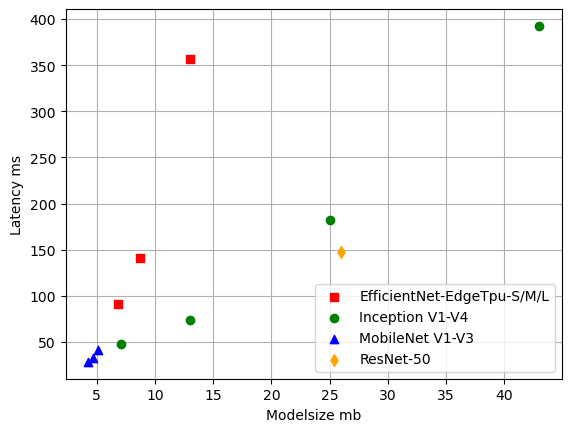

In [23]:
fig, ax = plt.subplots()

plt.xlabel('Modelsize mb')
plt.ylabel('Latency ms')
ax.set_axisbelow(True)
ax.grid()
ax.scatter(model_sizes[:3], mean_inf_times_cpu[:3], c='red', marker='s')
ax.scatter(model_sizes[3:7], mean_inf_times_cpu[3:7], c='green')
ax.scatter(model_sizes[7:10], mean_inf_times_cpu[7:10], c='blue', marker='^')
ax.scatter(model_sizes[10], mean_inf_times_cpu[10], c='orange', marker='d')
plt.legend(labels=['EfficientNet-EdgeTpu-S/M/L', 'Inception V1-V4', 'MobileNet V1-V3', 'ResNet-50'])

In [27]:
print(f'Mean inf times CPU:')
print(f'effnet-s: {mean_effnet_s_cpu : .2f}ms\neffnet-m: {mean_effnet_m_cpu : .2f}ms\neffnet-l: {mean_effnet_l_cpu : .2f}ms')
print(f'inceptv1: {mean_incept_v1_cpu : .2f}ms\ninceptv2: {mean_incept_v2_cpu : .2f}ms\ninceptv3: {mean_incept_v3_cpu : .2f}ms\ninceptv4: {mean_incept_v4_cpu : .2f}ms')
print(f'mobilev1: {mean_mobile_v1_cpu : .2f}ms\nmobilev2: {mean_mobile_v2_cpu : .2f}ms\nmobilev3: {mean_mobile_v3_cpu : .2f}ms\nresnet-50: {mean_resnet_50_cpu : .2f}ms')

Mean inf times CPU:
effnet-s:  91.14ms
effnet-m:  140.74ms
effnet-l:  356.51ms
inceptv1:  47.59ms
inceptv2:  74.35ms
inceptv3:  182.28ms
inceptv4:  392.51ms
mobilev1:  33.09ms
mobilev2:  28.39ms
mobilev3:  40.96ms
resnet-50:  147.98ms
